# 4-4
## 對1898-1968年紐約市人均日用水量序列進行Holt兩參數指數平滑，並預測未來15年的人均日用水量
### data4-4-2.csv

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

## Holt平滑并预测

In [3]:
def Holt(series, a, y, predict):
    length = len(series)
    xt = [0]*length
    xt[0] = series[0]
    rt = [0]*length
    rt[0] = (series[-1]-series[0])/length#以上为初始化数组与起始值
    for position in range(1,length):
        xt[position] = a*series[position]+(1-a)*(xt[position-1]+rt[position-1])
        rt[position] = y*(xt[position]-xt[position-1])+(1-y)*rt[position-1]
    if(predict!=0):#如果需要预测的话
        for tail in range(1, predict+1):
            xt.append((xt[length-1]+tail*rt[length-1]))
    return xt

## 画比较图

In [4]:
def drawcompare(series, Holt, predict):
    plt.plot(series, "*", label='Real')
    plt.plot(Holt[:-predict], "-", label='AfterHolt')
    if(predict!=0):
        plt.plot(range(int(len(Holt)-predict-1), int(len(Holt))), Holt[(len(Holt)-predict-1):], label='HoltPrediction',color='r')
        #为什么非得16才能连上，我明明只预测了15天
    plt.legend()
    plt.show()
    plt.close()

## 开始分析

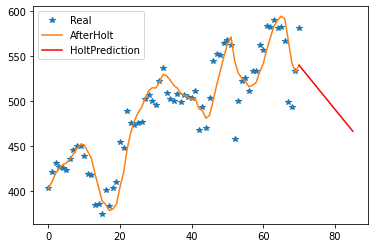

In [5]:
filename = "data4-4-2.csv"
series = pd.read_csv(filename, header=None)
series.iloc[:, 0] = series.iloc[:, 0].astype("float")
series = series.values[:, 0]
Holt = Holt(series, 0.3, 0.3, 15)#Holt平滑与预测，阿尔法0.3，伽马0.3，预测15天
drawcompare(series, Holt, 15)